/var/folders/45/2y6n9gfj11ncxxgrf7wj2t8m0000gn/T/ipykernel_96182/2215246927.py:85: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  cumulative_visitors = np.trapz(visitors, dx=(t - 1173) / len(visitors))
/var/folders/45/2y6n9gfj11ncxxgrf7wj2t8m0000gn/T/ipykernel_96182/2215246927.py:135: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  cumulative_visitors = np.trapz(visitors, dx=(t - 1173) / len(visitors))
/var/folders/45/2y6n9gfj11ncxxgrf7wj2t8m0000gn/T/ipykernel_96182/2215246927.py:181: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  cumulative_visitors = np.trapz(visitors, dx=(t - 1173) / len(visitors))


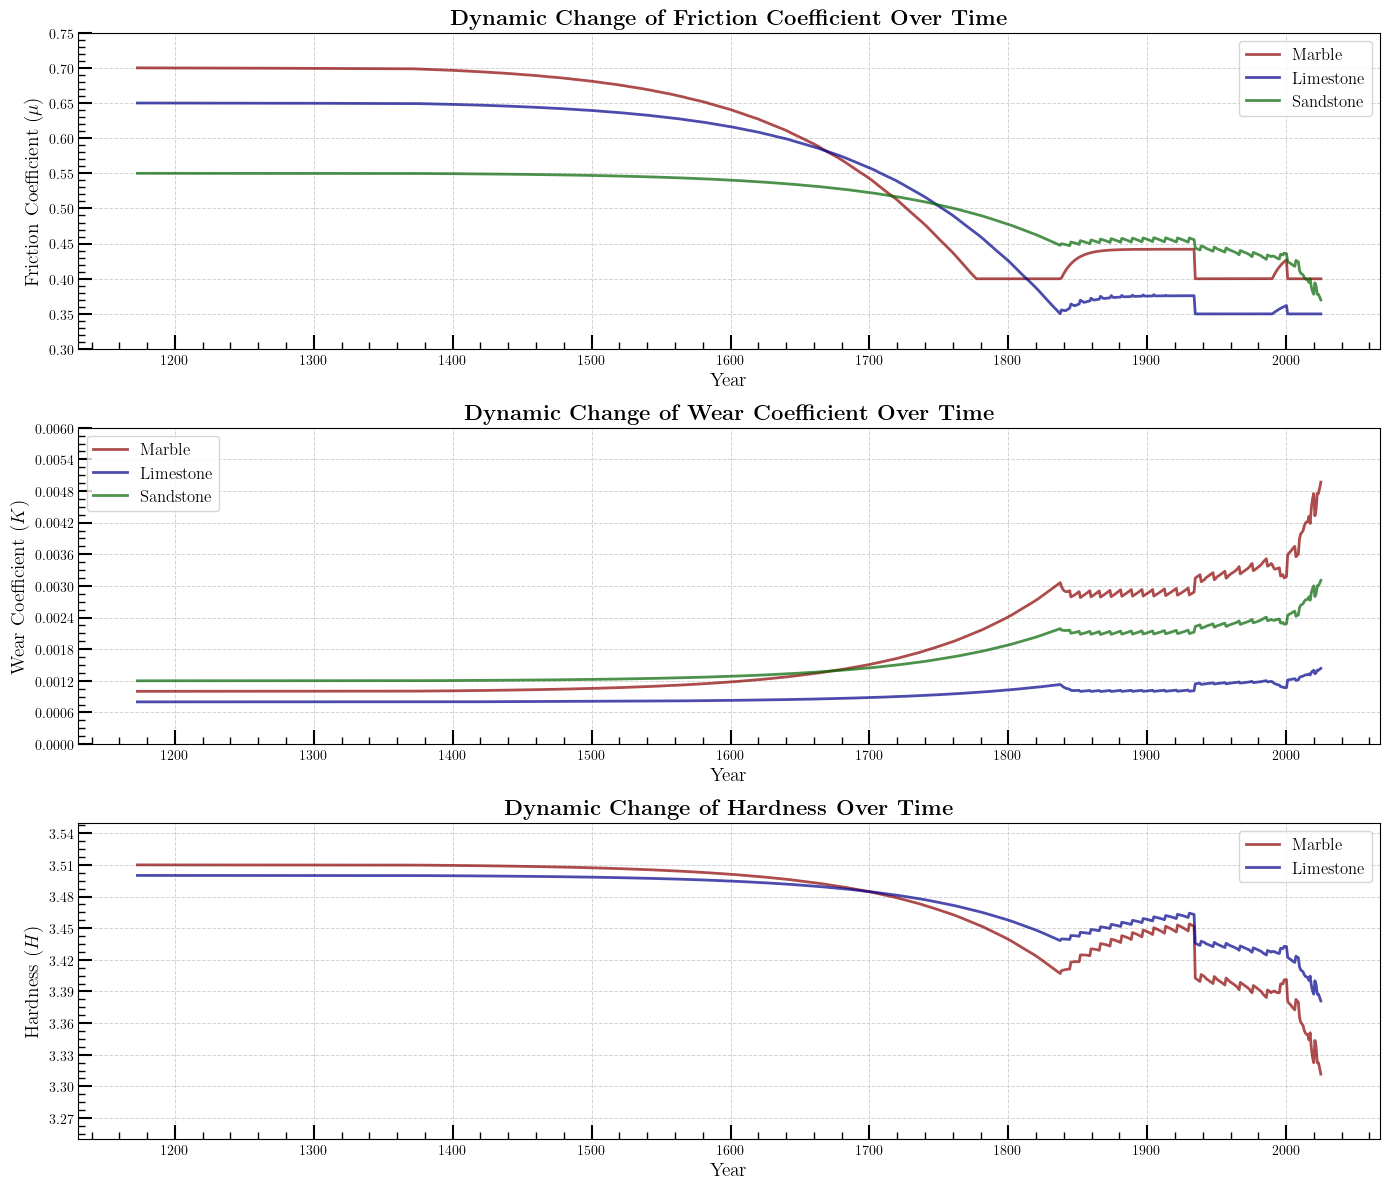

In [45]:
import numpy as np
import matplotlib.pyplot as plt


# 设置 LaTeX 样式
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


# 定义时间范围
Time = np.linspace(1173, 2025, 1000)
dt = Time[1] - Time[0]

# 定义年度游客人数模型
def annual_visitors_updated(t):
    def fluctuation(t, A, T):
        return 1 + A * np.sin(2 * np.pi * t / T)

    if t < 1372:
        N0 = 100
        r0 = 1
        A = 0.05
        T = 10
        return (N0 + r0 * (t - 1173)) * fluctuation(t, A, T)
    elif t < 1838:
        N1 = 2000
        r1 = 0.01
        A = 0.1
        T = 20
        return N1 * np.exp(r1 * (t - 1372)) * fluctuation(t, A, T)
    elif t < 1934:
        N2 = 5000
        r2 = 0.005
        A = 0.2
        T = 15
        return N2 * np.exp(r2 * (t - 1838)) * fluctuation(t, A, T)
    elif t < 1990:
        N3 = 100000
        r3 = 0.02
        A = 0.15
        T = 5
        return N3 * np.exp(r3 * (t - 1990)) * fluctuation(t, A, T)
    elif t < 2001:
        N4 = 100
        r4 = 1
        A = 0.05
        T = 10
        return (N4 + r4 * (t - 1173)) * fluctuation(t, A, T)
    elif t < 2020:
        N5 = 300000
        r5 = 0.07
        A = 0.05
        T = 3
        return N5 * np.exp(r5 * (t - 2001)) * fluctuation(t, A, T)
    elif t < 2022:
        N6 = 120000
        return N6
    else:
        N7 = 600000
        r5 = 0.05
        A = 0.1
        T = 5
        return N7 * np.exp(r5 * (t - 2022)) * fluctuation(t, A, T)

# 计算年度游客人数
visitor_counts_updated = [annual_visitors_updated(t) for t in Time]

# 摩擦系数动态方程（适用于大理石，石灰岩和砂岩）
def mu_t(t, material="marble", alpha=0.00000001, mu0=0.7, mu_min=0.3):
    # 不同材料的参数调整
    if material == "marble":
        mu0 = 0.7
        mu_min = 0.4
        alpha=0.00000005
    elif material == "limestone":
        mu0 = 0.65
        mu_min = 0.35
        alpha=0.00000003
    elif material == "sandstone":
        mu0 = 0.55
        mu_min = 0.25
        alpha=0.00000001
    
    visitors = np.array([annual_visitors_updated(year) for year in np.linspace(1173, t, 100)])
    cumulative_visitors = np.trapz(visitors, dx=(t - 1173) / len(visitors))
    mu = max(mu_min, mu0 * np.exp(-alpha * cumulative_visitors))
    return mu

# 修复摩擦系数动态方程（适用于大理石，石灰岩和砂岩）
def mu_repair(t, material="marble", mu0=0.7, mu_last=0.3, recovery_factor=0.05, recovery_ratio=0.03):
    # 根据不同材料调整修复系数
    if material == "marble":
        mu0 = 0.7
        recovery_factor=0.1
        recovery_ratio=0.06
    elif material == "limestone":
        mu0 = 0.65
        recovery_factor=0.06
        recovery_ratio=0.04
    elif material == "sandstone":
        mu0 = 0.55
        recovery_factor=0.04
        recovery_ratio=0.02
    
    if 1838 <= t <= 1934:
        return  recovery_ratio * (mu0) * (1 - np.exp(-recovery_factor * (t - 1838)))
    elif 1990 <= t <= 2001:
        return  recovery_ratio * (mu0) * (1 - np.exp(-recovery_factor * (t - 1990)))
    else:
        return 0

# 总摩擦系数（适用于大理石，石灰岩和砂岩）
def total_mu(t, material="marble"):
    mu_non_repair = mu_t(t, material=material)
    mu_repair_phase = mu_repair(t, material=material)
    return mu_non_repair + mu_repair_phase

# 磨损系数动态方程（适用于大理石，石灰岩和砂岩）
def K_t(t, material="marble", beta=0.0000002, K0=1e-3, K_max=1e-2):
    # 根据不同材料调整磨损系数
    if material == "marble":
        K0 = 1e-3
        K_max = 1e-2
        beta=0.0000001
    elif material == "limestone":
        K0 = 8e-4
        K_max = 8e-3
        beta=0.00000002
    elif material == "sandstone":
        K0 = 1.2e-3
        K_max = 1.5e-2
        beta=0.00000004
    
    visitors = np.array([annual_visitors_updated(year) for year in np.linspace(1173, t, 100)])
    cumulative_visitors = np.trapz(visitors, dx=(t - 1173) / len(visitors))
    return min(K_max, K0 * (1 + beta * cumulative_visitors))

# 修复磨损系数动态方程（适用于大理石，石灰岩和砂岩）
def K_repair(t, material="marble", K0=1e-3, K_max=1e-2, recovery_factor=0.05, recovery_ratio=0.02):
    # 根据不同材料调整磨损系数
    if material == "marble":
        K0 = 1e-3
        recovery_factor=0.4
        recovery_ratio=0.24
    elif material == "limestone":
        K0 = 8e-4
        recovery_factor=0.24
        recovery_ratio=0.16
    elif material == "sandstone":
        K0 = 1.2e-3
        recovery_factor=0.16
        recovery_ratio=0.08
    
    if 1838 <= t <= 1934:
        return  -recovery_ratio * (K0) * (1 - np.exp(-recovery_factor * (t - 1838)))
    elif 1990 <= t <= 2001:
        return  -recovery_ratio * (K0) * (1 - np.exp(-recovery_factor * (t - 1990)))
    else:
        return 0  # 非修复期间磨损系数为0

# 总磨损系数（适用于大理石，石灰岩和砂岩）
def total_K(t, material="marble"):
    K_non_repair = K_t(t, material=material)
    K_repair_phase = K_repair(t, material=material)
    return K_non_repair + K_repair_phase

# 硬度动态方程（适用于大理石，石灰岩和砂岩）
def H_t(t, material="marble", gamma=0.000000003, H0=3.5, H_min=3):
    # 根据不同材料调整硬度
    if material == "marble":
        H0 = 3.51
        H_min = 3
        gamma=0.000000005
    elif material == "limestone":
        H0 = 3.5
        H_min = 2.8
        gamma=0.000000003
  
    
    visitors = np.array([annual_visitors_updated(year) for year in np.linspace(1173, t, 100)])
    cumulative_visitors = np.trapz(visitors, dx=(t - 1173) / len(visitors))
    return max(H_min, H0 - gamma * cumulative_visitors)

# 修复硬度动态方程（适用于大理石，石灰岩和砂岩）
def H_repair(t, material="marble", H0=3.5, H_min=3, recovery_factor=0.5, recovery_ratio=0.01):
    # 根据不同材料调整硬度
    if material == "marble":
        H0 = 3.51
        recovery_factor=0.025
        recovery_ratio=0.015
    elif material == "limestone":
        H0 = 3.5
        recovery_factor=0.015
        recovery_ratio=0.01
    
    
    if 1838 <= t <= 1934:
        return recovery_ratio * (H0) * (1 - np.exp(-recovery_factor * (t - 1838)))
    elif 1990 <= t <= 2001:
        return recovery_ratio * (H0) * (1 - np.exp(-recovery_factor * (t - 1990)))
    else:
        return 0

# 总硬度（适用于大理石，石灰岩和砂岩）
def total_H(t, material="marble"):
    H_non_repair = H_t(t, material=material)
    H_repair_phase = H_repair(t, material=material)
    return H_non_repair + H_repair_phase


# 计算不同材料的摩擦系数、磨损系数和硬度
mu_dynamic_marble = [total_mu(t, material="marble") for t in Time]
mu_dynamic_limestone = [total_mu(t, material="limestone") for t in Time]
mu_dynamic_sandstone = [total_mu(t, material="sandstone") for t in Time]

K_dynamic_marble = [total_K(t, material="marble") for t in Time]
K_dynamic_limestone = [total_K(t, material="limestone") for t in Time]
K_dynamic_sandstone = [total_K(t, material="sandstone") for t in Time]

H_dynamic_marble = [total_H(t, material="marble") for t in Time]
H_dynamic_limestone = [total_H(t, material="limestone") for t in Time]


# 绘图
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# 设置坐标轴样式（像尺子的刻度）
for ax in axes:
    # 调整主刻度和次刻度的间隔
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))  # 主刻度设置为最多10个
    ax.xaxis.set_minor_locator(plt.MaxNLocator(20))  # 次刻度设置为最多20个
    ax.yaxis.set_major_locator(plt.MaxNLocator(10))  # 主刻度设置为最多10个
    ax.yaxis.set_minor_locator(plt.MaxNLocator(20))  # 次刻度设置为最多20个
    
    ax.tick_params(axis='both', which='major', direction='in', length=10, width=1.5, color='black')  # 主刻度
    ax.tick_params(axis='both', which='minor', direction='in', length=5, width=1, color='black')  # 次刻度
    ax.minorticks_on()  # 开启次刻度

    # 仅设置主刻度的网格为虚线，次刻度不添加网格
    ax.grid(visible=True, which='major', linestyle='--', linewidth=0.7, color='lightgrey')
    ax.grid(visible=False, which='minor')  # 关闭次刻度的网格线

# 摩擦系数
axes[0].plot(Time, mu_dynamic_marble, label="Marble", color='darkred', linewidth=2, alpha=0.7)
axes[0].plot(Time, mu_dynamic_limestone, label="Limestone", color='darkblue', linewidth=2, alpha=0.7)
axes[0].plot(Time, mu_dynamic_sandstone, label="Sandstone", color='darkgreen', linewidth=2, alpha=0.7)
axes[0].set_title(r'\textbf{Dynamic Change of Friction Coefficient Over Time}', fontsize=16)
axes[0].set_ylabel(r'Friction Coefficient ($\mu$)', fontsize=14)  # 添加单位
axes[0].set_xlabel(r'Year', fontsize=14)
axes[0].legend(fontsize=12)
axes[0].grid(True)

# 磨损系数
axes[1].plot(Time, K_dynamic_marble, label="Marble", color='darkred', linewidth=2, alpha=0.7)
axes[1].plot(Time, K_dynamic_limestone, label="Limestone", color='darkblue', linewidth=2, alpha=0.7)
axes[1].plot(Time, K_dynamic_sandstone, label="Sandstone", color='darkgreen', linewidth=2, alpha=0.7)
axes[1].set_title(r'\textbf{Dynamic Change of Wear Coefficient Over Time}', fontsize=16)
axes[1].set_ylabel(r'Wear Coefficient ($K$)', fontsize=14)  # 添加单位
axes[1].set_xlabel(r'Year', fontsize=14)
axes[1].legend(fontsize=12)
axes[1].grid(True)

# 硬度
axes[2].plot(Time, H_dynamic_marble, label="Marble", color='darkred', linewidth=2, alpha=0.7)
axes[2].plot(Time, H_dynamic_limestone, label="Limestone", color='darkblue', linewidth=2, alpha=0.7)
axes[2].set_title(r'\textbf{Dynamic Change of Hardness Over Time}', fontsize=16)
axes[2].set_ylabel(r'Hardness ($H$)', fontsize=14)  # 添加单位
axes[2].set_xlabel(r'Year', fontsize=14)
axes[2].legend(fontsize=12)
axes[2].grid(True)

# 设置 y 轴范围，拉大 y 轴
axes[0].set_ylim(0.3, 0.75)  # 调整摩擦系数的 y 轴范围
axes[1].set_ylim(0, 0.006)  # 调整磨损系数的 y 轴范围
axes[2].set_ylim(3.25, 3.55 )  # 调整硬度的 y 轴范围


plt.tight_layout()
plt.show()


